In [10]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
# 2. Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset Loaded Successfully!\n")
print(df.head())

Saving diabetes.csv to diabetes (1).csv
Dataset Loaded Successfully!

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [12]:
# 3. Data summary
print("Shape of data:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

print("\nMissing values before cleaning:")
print(df.isnull().sum())

Shape of data: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Basic statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.36957

In [13]:
# 4. Data cleaning
# In this dataset, some 0 values actually mean "missing"
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)

print("\nMissing values after replacing 0 with NaN:")
print(df.isnull().sum())

# Fill missing values with column mean
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].fillna(df[cols_with_zero_as_missing].mean())

print("\nMissing values after filling with mean:")
print(df.isnull().sum())


Missing values after replacing 0 with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after filling with mean:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


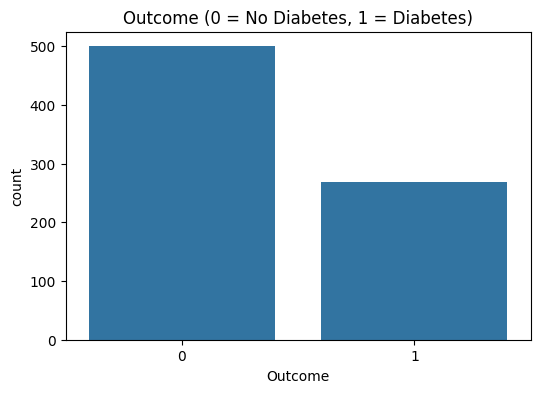

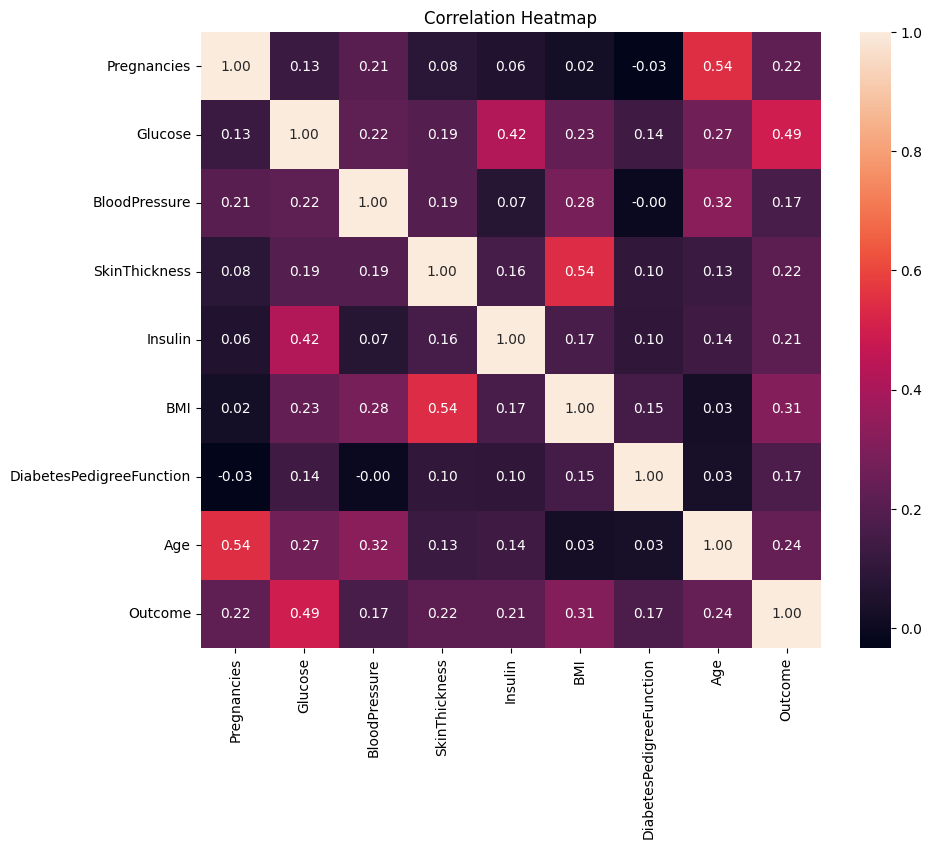

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outcome distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape :", X_test.shape)


Training shape: (576, 8)
Testing shape : (192, 8)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
acc_log = accuracy_score(y_test, log_pred)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=120, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, rf_pred)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, knn_pred)

print("Model Accuracies:")
print("-----------------")
print("Logistic Regression :", round(acc_log, 3))
print("Random Forest       :", round(acc_rf, 3))
print("KNN                 :", round(acc_knn, 3))

# choose best
best_model = rf_model
best_name = "Random Forest"
if acc_log > acc_rf and acc_log > acc_knn:
    best_model = log_model
    best_name = "Logistic Regression"
elif acc_knn > acc_rf and acc_knn > acc_log:
    best_model = knn_model
    best_name = "KNN"

print("\nBest model selected:", best_name)

print("\nClassification report of best model:")
best_pred = best_model.predict(X_test)
print(classification_report(y_test, best_pred))


Model Accuracies:
-----------------
Logistic Regression : 0.729
Random Forest       : 0.755
KNN                 : 0.656

Best model selected: Random Forest

Classification report of best model:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       123
           1       0.64      0.72      0.68        69

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.76      0.76      0.76       192



In [17]:
def risk_label(prob):
    if prob < 0.30:
        return "Low Risk"
    elif prob < 0.60:
        return "Moderate Risk"
    else:
        return "High Risk"

print("\nEnter patient details:")

preg = float(input("Pregnancies: "))
glu  = float(input("Glucose: "))
bp   = float(input("Blood Pressure: "))
skin = float(input("Skin Thickness: "))
ins  = float(input("Insulin: "))
bmi  = float(input("BMI: "))
ped  = float(input("Diabetes Pedigree Function: "))
age  = float(input("Age: "))

new_patient = np.array([[preg, glu, bp, skin, ins, bmi, ped, age]])

prob = best_model.predict_proba(new_patient)[0][1]
label = risk_label(prob)

print("\nPredicted probability of diabetes:", round(prob, 3))
print("Risk category:", label)



Enter patient details:
Pregnancies: 3
Glucose: 30
Blood Pressure: 70
Skin Thickness: 5
Insulin: 100
BMI: 28
Diabetes Pedigree Function: 43
Age: 26

Predicted probability of diabetes: 0.133
Risk category: Low Risk


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
import os

for root, dirs, files in os.walk('/content', topdown=True):
    for name in files:
        print(os.path.join(root, name))


/content/diabetes (1).csv
/content/diabetes.csv
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/configurations/config_default
/content/.config/logs/2025.11.20/14.30.04.285207.log
/content/.config/logs/2025.11.20/14.30.45.231815.log
/content/.config/logs/2025.11.20/14.30.27.010422.log
/content/.config/logs/2025.11.20/14.30.36.623222.log
/content/.config/logs/2025.11.20/14.30.35.382199.log
/content/.config/logs/2025.11.20/14.30.45.937471.log
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
